In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [25]:
def smooth_labels(labels, factor=0.1):
	# smooth the labels
	labels *= (1 - factor)
	labels += (factor / labels.shape[1])
	# returned the smoothed labels
	return labels

In [29]:
enc = OneHotEncoder()
enc.fit([[0], [1]]) 
def names(number):
    if(number == 0):
        return 'Trash'
    else:
        return 'Recyclable'

C:\Users\Vee\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [30]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\trash\r"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    #x = img.resize((128,128))
    data.append(np.array(img))
    ans.append(enc.transform([[1]]).toarray())

In [31]:
paths = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\trash\t"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    #x = img.resize((128,128))
    data.append(np.array(img))
    ans.append(enc.transform([[0]]).toarray())

In [32]:
data = np.array(data)
data.shape

(127, 256, 256, 3)

In [34]:
ans = np.array(ans)
ans = ans.reshape(len(ans),2)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(data, smooth_labels(ans), test_size=0.5, shuffle=True, random_state=75)

In [37]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adamax')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 32)       

In [39]:
history = model.fit(x_train, y_train, epochs=2500, batch_size=25, verbose=1,validation_data=(x_test, y_test),callbacks=callbacks_list)

Train on 63 samples, validate on 64 samples
Epoch 1/2500
63/63 [==============================] - 9s 140ms/step - loss: 1.6083 - val_loss: 5.8440
Epoch 2/2500
63/63 [==============================] - 8s 131ms/step - loss: 0.6252 - val_loss: 4.1180
Epoch 3/2500
63/63 [==============================] - 8s 131ms/step - loss: 0.5374 - val_loss: 3.0894
Epoch 4/2500
63/63 [==============================] - 8s 128ms/step - loss: 0.6118 - val_loss: 2.1584
Epoch 5/2500
63/63 [==============================] - 8s 128ms/step - loss: 0.5495 - val_loss: 1.5833
Epoch 6/2500
63/63 [==============================] - 8s 128ms/step - loss: 0.5404 - val_loss: 1.0836
Epoch 7/2500
63/63 [==============================] - 8s 129ms/step - loss: 0.5426 - val_loss: 0.7930
Epoch 8/2500
63/63 [==============================] - 8s 129ms/step - loss: 0.5442 - val_loss: 0.7403
Epoch 9/2500
63/63 [==============================] - 8s 129ms/step - loss: 0.5017 - val_loss: 0.7244
Epoch 10/2500
63/63 [=================

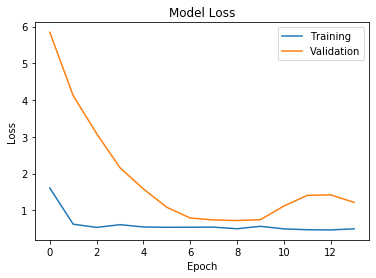

In [40]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

[[0.3028877  0.69711226]]
69.71122622489929% Confidence This Is Recyclable


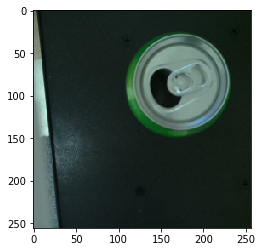

In [43]:
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\trash\r\73.jpg')
x = np.array(img)
x = x.reshape(1,256,256,3)
answ = model.predict_on_batch(x)
print(answ)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

[[0.76687646 0.23312351]]
76.68764591217041% Confidence This Is Trash


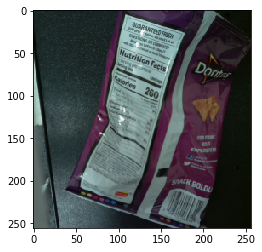

In [50]:
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\trash\t\5.jpg')
x = np.array(img)
x = x.reshape(1,256,256,3)
answ = model.predict_on_batch(x)
print(answ)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [51]:
model.save('trash.h5')